## 5 - Correlation Analysis
## Table of Contents
<ul>
<li><a href="#1">Size vs Angle</a></li>
<li><a href="#2">Brightness vs Angle</a></li>
<li><a href="#3">Brightness vs Size</a></li>
</ul>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
df_segments = pd.read_csv("./output/df_segments_3.csv")
df_segments.head()

,fracture_id,segment_id,X1,Y1,X2,Y2,delta_X,delta_Y,segment_size,angle_radian,angle_degree,median_brightness
0,1528,1528_2,14880.257,8797.5608,14890.307,8777.9108,10.050,-19.6500,22.070908,2.043562,117.087491,155.0
1,1528,1528_1,14872.006,8806.2608,14880.257,8797.5608,8.251,-8.7000,11.990371,2.329713,133.482698,94.0
2,1527,1527_4,20349.119,3322.3508,20357.025,3323.7462,7.906,1.3954,8.028199,0.174700,10.009551,196.0
3,1527,1527_3,20350.282,3311.8852,20349.119,3322.3508,-1.163,10.4656,10.530021,1.681468,96.341033,182.0
4,1527,1527_2,20338.188,3311.4201,20350.282,3311.8852,12.094,0.4651,12.102940,0.038438,2.202343,212.0


<a id='1'></a>
### Size vs Angle

#### Scatter Plot

<AxesSubplot:xlabel='angle_degree', ylabel='segment_size'>

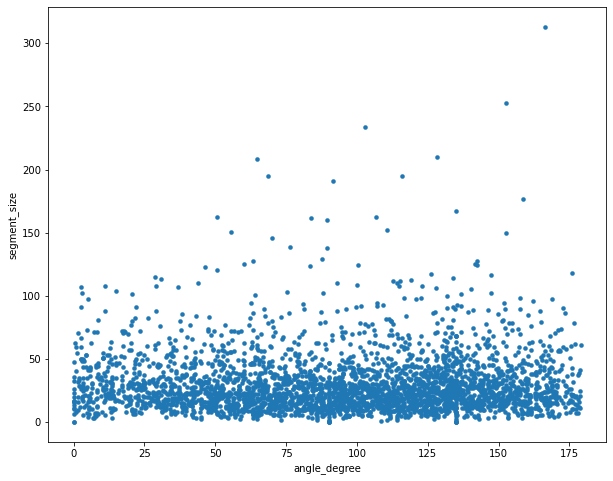

In [3]:
df_segments.plot(x='angle_degree', y='segment_size', kind='scatter', linewidths=0.1, figsize=(10,8))

#### Average Size vs Angle

In [4]:
number_of_angle_bins = 18

In [5]:
bin_edges_angle_degree = np.linspace(0, 180, number_of_angle_bins+1)

bin_edges_angle_degree

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])

In [6]:
df_segments['bin_angle_degree'] = pd.cut(x=df_segments['angle_degree'], bins=bin_edges_angle_degree)

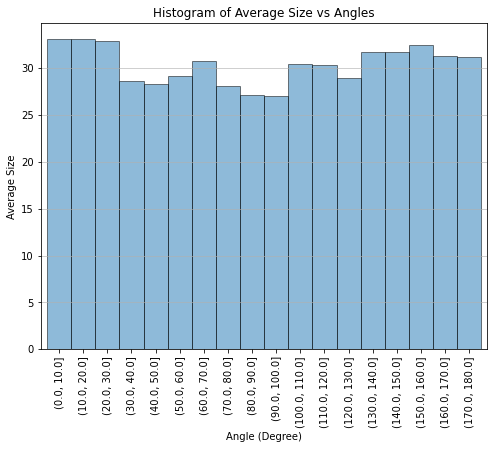

In [7]:
plt.figure(figsize=(8, 6))

ax = df_segments.groupby('bin_angle_degree')['segment_size'].mean().plot(kind='bar', width=1.0, alpha=0.5, ec='black')

plt.grid(axis='y', alpha=0.75)

# set chart title
ax.set_title('Histogram of Average Size vs Angles')
# set x, y axes labels
ax.set_xlabel("Angle (Degree)")
ax.set_ylabel("Average Size")

plt.show()

#### Deviation of Segment Size from the Average

In [8]:
hist_vals = df_segments.groupby('bin_angle_degree')['segment_size'].mean()

average_val = hist_vals.mean()

avg_variance_size = hist_vals - average_val

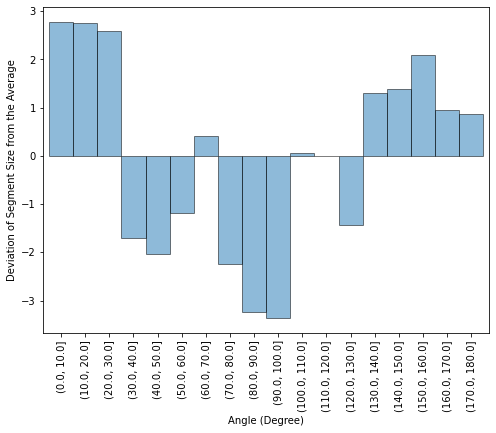

In [9]:
plt.figure(figsize=(8, 6))
ax = avg_variance_size.plot(kind='bar', width=1.0, alpha=0.5, ec='black')

# set x, y axes labels
ax.set_xlabel("Angle (Degree)")
ax.set_ylabel("Deviation of Segment Size from the Average")

plt.show()

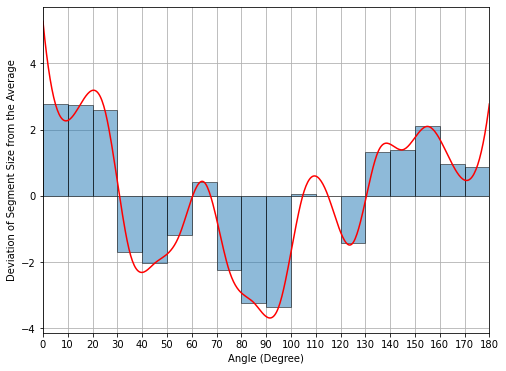

In [10]:
bin_labels_angle = np.zeros(number_of_angle_bins)

for i in range(number_of_angle_bins):
    bin_labels_angle[i] = (bin_edges_angle_degree[i] +
                           bin_edges_angle_degree[i+1])/2

X_Y_Spline = make_interp_spline(bin_labels_angle, avg_variance_size.values)

X_ = np.linspace(0, 180, 500)
Y_ = X_Y_Spline(X_)

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 180/number_of_angle_bins

ax.set_xlabel('Angle (Degree)')
ax.set_ylabel('Deviation of Segment Size from the Average')
ax.bar(bin_labels_angle, height=avg_variance_size.values,
       width=bar_width, alpha=0.5, ec='black')

# Set axis ranges and major ticks
ax.set_xlim(0, 180)
ax.xaxis.set_major_locator(MultipleLocator(bar_width))

ax.grid()
ax.set_axisbelow(True)

plt.plot(X_, Y_, color='red')
plt.show()

<a id='2'></a>
### Brightness vs Angle

#### Scatter plot

<AxesSubplot:xlabel='angle_degree', ylabel='median_brightness'>

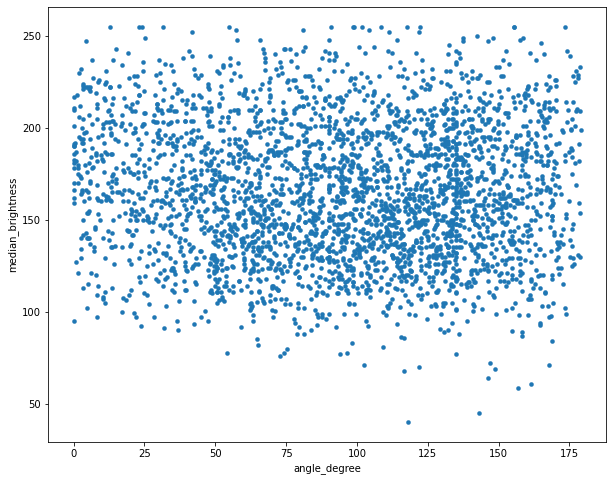

In [11]:
df_segments.plot(x='angle_degree', y='median_brightness', kind='scatter', linewidths=0.1, figsize=(10,8))

#### Average Brightness vs Angle

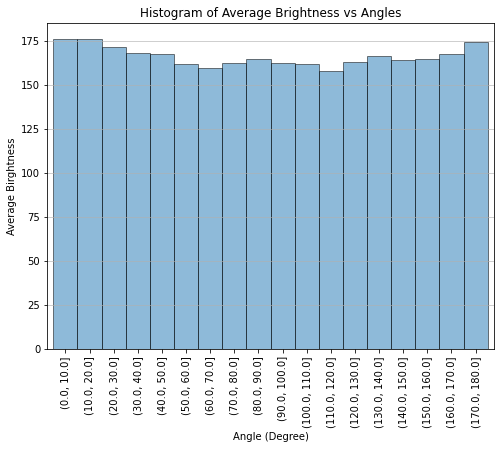

In [12]:
plt.figure(figsize=(8, 6))

ax = df_segments.groupby('bin_angle_degree')['median_brightness'].mean().plot(kind='bar', width=1.0, alpha=0.5, ec='black')

plt.grid(axis='y', alpha=0.75)

# set chart title
ax.set_title('Histogram of Average Brightness vs Angles')
# set x, y axes labels
ax.set_xlabel("Angle (Degree)")
ax.set_ylabel("Average Birghtness")

plt.show()

#### Deviation of Brightness from the Average

In [13]:
hist_vals = df_segments.groupby('bin_angle_degree')['median_brightness'].mean()

average_val = hist_vals.mean()

avg_variance_brightness_angle = hist_vals - average_val

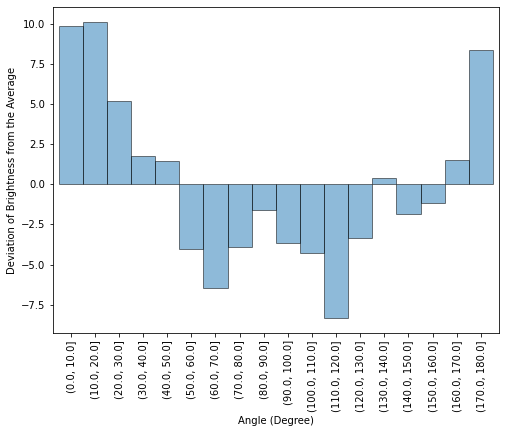

In [14]:
plt.figure(figsize=(8, 6))
ax = avg_variance_brightness_angle.plot(kind='bar', width=1.0, alpha=0.5, ec='black')

# set x, y axes labels
ax.set_xlabel("Angle (Degree)")
ax.set_ylabel("Deviation of Brightness from the Average")

plt.show()

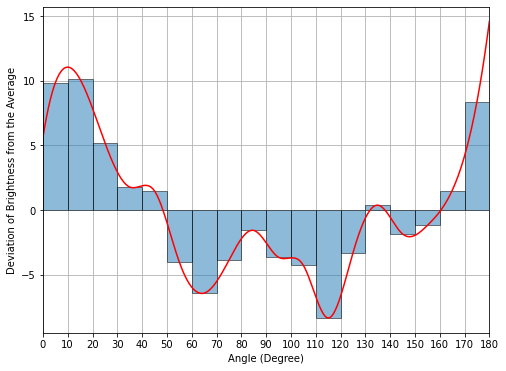

In [15]:
bin_labels_angle = np.zeros(number_of_angle_bins)

for i in range(number_of_angle_bins):
    bin_labels_angle[i] = (bin_edges_angle_degree[i] +
                           bin_edges_angle_degree[i+1])/2

X_Y_Spline = make_interp_spline(bin_labels_angle, avg_variance_brightness_angle.values)

X_ = np.linspace(0, 180, 500)
Y_ = X_Y_Spline(X_)

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 180/number_of_angle_bins

ax.set_xlabel('Angle (Degree)')
ax.set_ylabel('Deviation of Brightness from the Average')
ax.bar(bin_labels_angle, height=avg_variance_brightness_angle.values,
       width=bar_width, alpha=0.5, ec='black')

# Set axis ranges and major ticks
ax.set_xlim(0, 180)
ax.xaxis.set_major_locator(MultipleLocator(bar_width))

ax.grid()
ax.set_axisbelow(True)

plt.plot(X_, Y_, color='red')
plt.show()

<a id='3'></a>
### Brightness vs Size

#### Scatter plot

<AxesSubplot:xlabel='segment_size', ylabel='median_brightness'>

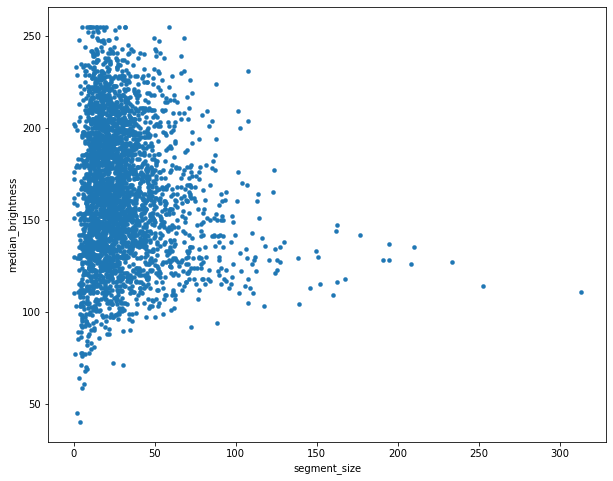

In [16]:
df_segments.plot(x='segment_size', y='median_brightness', kind='scatter', linewidths=0.1, figsize=(10,8))

#### Average Brightness vs Size

In [17]:
min_segment_size = df_segments.segment_size.min()
max_segment_size = df_segments.segment_size.max()

In [18]:
number_of_size_bins = 30
bin_edges_segment_size = np.linspace(min_segment_size, max_segment_size, number_of_size_bins+1)

In [19]:
df_segments['bin_segment_size'] = pd.cut(x=df_segments['segment_size'], bins=bin_edges_segment_size)

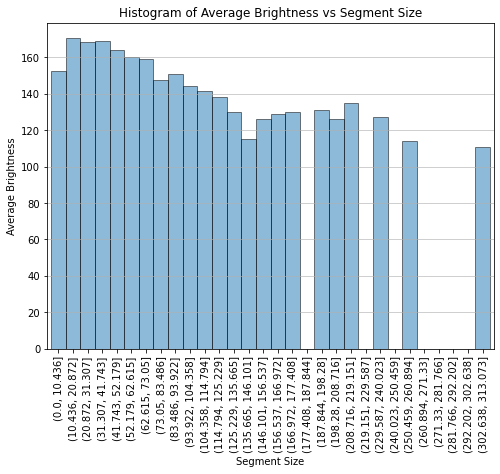

In [20]:
plt.figure(figsize=(8, 6))

ax = df_segments.groupby('bin_segment_size')['median_brightness'].mean().plot(kind='bar', width=1.0, alpha=0.5, ec='black')

plt.grid(axis='y', alpha=0.75)

# set chart title
ax.set_title('Histogram of Average Brightness vs Segment Size')
# set x, y axes labels
ax.set_xlabel("Segment Size")
ax.set_ylabel("Average Brightness")

plt.show()

#### Deviation of Brightness from the Average

In [21]:
hist_vals = df_segments.groupby('bin_segment_size')['median_brightness'].mean()

average_val = hist_vals.mean()

avg_variance_brightness_size = hist_vals - average_val

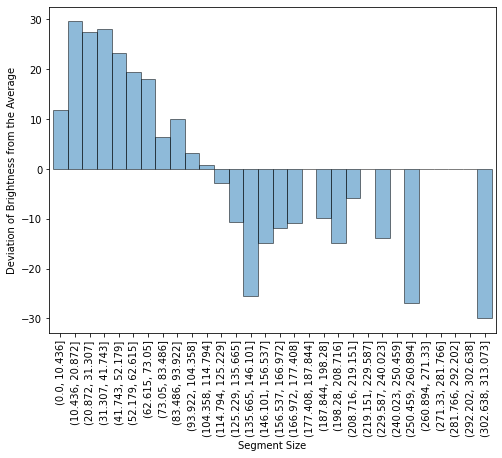

In [22]:
plt.figure(figsize=(8, 6))
ax = avg_variance_brightness_size.plot(kind='bar', width=1.0, alpha=0.5, ec='black')

# set x, y axes labels
ax.set_xlabel("Segment Size")
ax.set_ylabel("Deviation of Brightness from the Average")

plt.show()

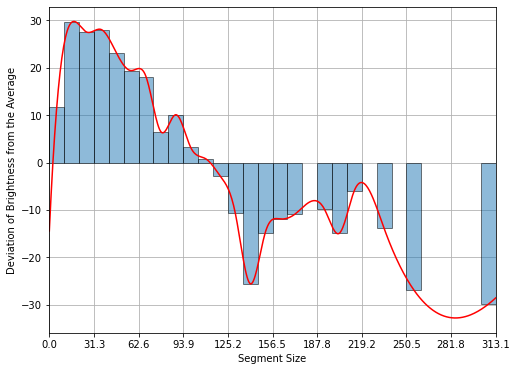

In [23]:
bin_labels_size = np.zeros(number_of_size_bins)

for i in range(number_of_size_bins):
    bin_labels_size[i] = (bin_edges_segment_size[i] +
                           bin_edges_segment_size[i+1])/2

mask=np.isfinite(avg_variance_brightness_size.values)

X_Y_Spline = make_interp_spline(bin_labels_size[mask], avg_variance_brightness_size.values[mask])

X_ = np.linspace(min_segment_size, max_segment_size, 500)
Y_ = X_Y_Spline(X_)

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = (max_segment_size-min_segment_size)/number_of_size_bins

ax.set_xlabel('Segment Size')
ax.set_ylabel('Deviation of Brightness from the Average')
ax.bar(bin_labels_size[mask], height=avg_variance_brightness_size.values[mask],
       width=bar_width, alpha=0.5, ec='black')

# Set axis ranges and major ticks
ax.set_xlim(min_segment_size, max_segment_size)
ax.xaxis.set_major_locator(MultipleLocator(bar_width*3))

ax.grid()
ax.set_axisbelow(True)

plt.plot(X_, Y_, color='red')
plt.show()